<img src=".\images\Logo.png" width=150 align="left" /> <img src=".\images\Logo2.jpg" width=450 align="right" />


# <center><font color= #1e8449 > <b>CU25_Modelo de gestión de Lista de Espera Quirúrgica</font></center>

<font color='steelblue'><b>Citizenlab Data Science Methodology > II - Data Processing Domain </font>
***
> # <font color='steelblue'> <b>12.- EDA - Exploratory Data Analysis Analysis</font>

## <font color='steelblue'>Tasks</font>

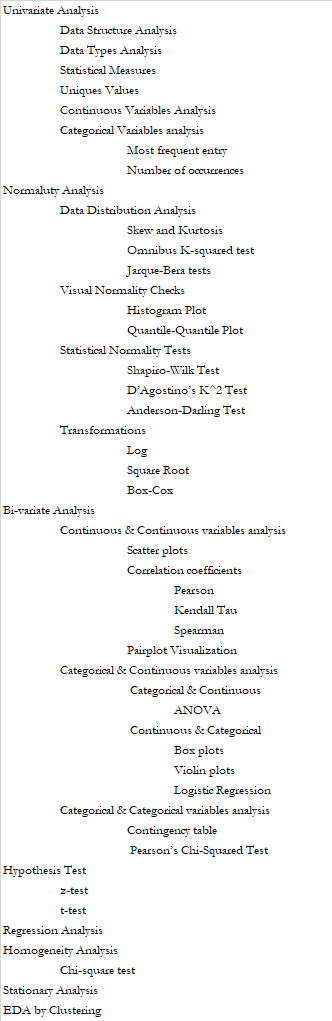
    


## <font color='green'>File</font>

- <font color='steelblue'> <b>Input File: CU_25_09.2_01_lista_espera_completo_clean_v_01.csv</font>
- <font color='steelblue'> <b>Output File: No aplica</font>

### Encoding

Con la siguiente expresión se evitan problemas con el encoding al ejecutar el notebook. Es posible que deba ser eliminada o adaptada a la máquina en la que se ejecute el código.

In [57]:
Sys.setlocale(category = "LC_ALL", locale = "es_ES.UTF-8")

[1] "LC_COLLATE=es_ES.UTF-8;LC_CTYPE=es_ES.UTF-8;LC_MONETARY=es_ES.UTF-8;LC_NUMERIC=C;LC_TIME=es_ES.UTF-8"

## <font color='green'>Settings</font>

### Libraries to use

In [58]:
library(readr)
library(dplyr)
library(sf)
library(tidyr)
library(ggplot2)
library(summarytools)
library(GGally)
library(nortest)
library(lubridate)


### Paths

In [59]:
iPath <- "Data/Input/"
oPath <- "Data/Output/"

## <font color='green'>Data Load</font>

<font color='tomato'><b> OPCION A:</b> Seleccionar fichero en ventana para mayor comodidad</font> 

Data load using the {tcltk} package. Ucomment the line if using this option

In [60]:
# file_data <- tcltk::tk_choose.files(multi = FALSE)

<font color='tomato'><b> OPCION B:</b> Especificar el nombre de archivo</font>



In [61]:
iFile <- "CU_25_09.2_01_lista_espera_completo_clean_v_01.csv"

file_data <- paste0(iPath, iFile)

if(file.exists(file_data)){
    cat("Se leerán datos del archivo: ", file_data)
} else{
    warning("Cuidado: el archivo no existe.")
}


Se leerán datos del archivo:  Data/Input/CU_25_09.2_01_lista_espera_completo_clean_v_01.csv

#### Data file to dataframe

Usar la función adecuada según el formato de entrada (xlsx, csv, json, ...)

In [62]:
data <- read_csv(file_data)


Rows: 55216 Columns: 46
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (6): Hospital, Especialidad, nombre_area, Municipio, Clase, Dependencia
dbl (39): total_pacientes, ano, semana, CODCNH, id_area, cmunicipio, CAMAS, ...
lgl  (1): is_train

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Data Structure

Estructura de  los datos:

In [63]:
data |> glimpse()

Rows: 55,216
Columns: 46
$ Hospital          <chr> "HOSPITAL REY JUAN CARLOS", "HOSPITAL CENTRAL DE LA …
$ Especialidad      <chr> "UROLOGÍA", "ODONTOESTOMATOLOGÍA", "GINECOLOGÍA", "D…
$ total_pacientes   <dbl> 344, 0, 52, 37, 0, 4, 0, 718, 0, 271, 108, 0, 34, 86…
$ ano               <dbl> 2021, 2020, 2021, 2021, 2021, 2020, 2021, 2020, 2021…
$ semana            <dbl> 30, 36, 49, 23, 3, 5, 50, 7, 35, 1, 42, 10, 21, 33, …
$ CODCNH            <dbl> 281348, 280724, 281292, 281292, 281236, 280724, 2807…
$ id_area           <dbl> 8, 7, 11, 11, 11, 7, 3, 6, 1, 2, 2, 8, 11, 11, 1, 3,…
$ nombre_area       <chr> "SUR-OESTE I", "CENTRO-OESTE", "SUR II", "SUR II", "…
$ cmunicipio        <dbl> 280920, 280796, 280133, 280133, 281610, 280796, 2800…
$ Municipio         <chr> "MÓSTOLES", "MADRID", "ARANJUEZ", "ARANJUEZ", "VALDE…
$ CAMAS             <dbl> 382, 475, 98, 98, 182, 475, 507, 613, 269, 1143, 156…
$ Clase             <chr> "HOSPITALES GENERALES", "HOSPITALES GENERALES", "HOS…
$ Dependencia  

Muestra de los primeros datos:

In [64]:
data |> slice_head(n = 5)

Hospital,Especialidad,total_pacientes,ano,semana,CODCNH,id_area,nombre_area,cmunicipio,Municipio,⋯,t9_1,t10_1,t11_1,t12_1,capacidad,pacientes,consultas,hospitalizaciones,Target,is_train
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
HOSPITAL REY JUAN CARLOS,UROLOGÍA,344,2021,30,281348,8,SUR-OESTE I,280920,MÓSTOLES,⋯,0.3348780,0.1369254,0.5072726,0.5849309,17,1447,573,12,54.45,TRUE
HOSPITAL CENTRAL DE LA DEFENSA GOMEZ ULLA,ODONTOESTOMATOLOGÍA,0,2020,36,280724,7,CENTRO-OESTE,280796,MADRID,⋯,0.4914365,0.1217100,0.4915713,0.5597213,0,1211,45,0,0.00,TRUE
HOSPITAL UNIVERSITARIO DEL TAJO,GINECOLOGÍA,52,2021,49,281292,11,SUR II,280133,ARANJUEZ,⋯,0.3346063,0.1517321,0.5024130,0.5900028,8,1293,108,2,37.96,TRUE
HOSPITAL UNIVERSITARIO DEL TAJO,DERMATOLOGÍA,37,2021,23,281292,11,SUR II,280133,ARANJUEZ,⋯,0.3346063,0.1517321,0.5024130,0.5900028,5,1501,103,2,23.14,TRUE
HOSPITAL UNIVERSITARIO INFANTA ELENA,ODONTOESTOMATOLOGÍA,0,2021,3,281236,11,SUR II,281610,VALDEMORO,⋯,0.3346063,0.1517321,0.5024130,0.5900028,0,1240,44,0,0.00,TRUE


**Tamaño de Memoria** de los datos

In [65]:
object.size(data)

20133120 bytes

**Structure of non-numerical features**

In [66]:
# Display non-numerical features
data |> select(where(~ !is.numeric(.x))) |> freq()

,Freq,% Valid,% Valid Cum.,% Total,% Total Cum.
HOSPITAL CENTRAL DE LA CRUZ ROJA SAN JOSE Y SANTA ADELA,1904,3.448276,3.448276,3.448276,3.448276
HOSPITAL CENTRAL DE LA DEFENSA GOMEZ ULLA,1904,3.448276,6.896552,3.448276,6.896552
HOSPITAL CLINICO SAN CARLOS,1904,3.448276,10.344828,3.448276,10.344828
HOSPITAL EL ESCORIAL,1904,3.448276,13.793103,3.448276,13.793103
HOSPITAL GENERAL DE VILLALBA,1904,3.448276,17.241379,3.448276,17.241379
HOSPITAL GENERAL UNIVERSITARIO GREGORIO MARAÑON,1904,3.448276,20.689655,3.448276,20.689655
HOSPITAL INFANTIL UNIVERSITARIO NIÑO JESUS,1904,3.448276,24.137931,3.448276,24.137931
HOSPITAL RAMON Y CAJAL,1904,3.448276,27.586207,3.448276,27.586207
HOSPITAL REY JUAN CARLOS,1904,3.448276,31.034483,3.448276,31.034483
HOSPITAL UNIVERSITARIO 12 DE OCTUBRE,1904,3.448276,34.482759,3.448276,34.482759


**Structure of numerical features**

In [67]:
data |> select(where(is.numeric)) |> descr()


,ALI,ano,ASD,CAMAS,capacidad,cmunicipio,CODCNH,consultas,DIAL,DO,⋯,t5_1,t6_1,t7_1,t8_1,t9_1,TAC,Target,total_pacientes,X,Y
Mean,7.586207e-01,2.021101e+03,8.965517e-01,4.397241e+02,2.066164e+01,2.807621e+05,2.807908e+05,6.130194e+02,1.713793e+01,6.896552e-01,⋯,1.369202e-01,1.991894e-01,5.743669e-02,4.624794e-02,4.169681e-01,1.793103e+00,4.225130e+01,3.748656e+02,-3.712526e+00,4.039635e+01
Std.Dev,1.134278e+00,7.603137e-01,9.227041e-01,3.094683e+02,3.874765e+01,3.671827e+02,5.108765e+02,1.334766e+03,1.412207e+01,6.999299e-01,⋯,2.292577e-02,3.591920e-02,9.001087e-03,9.878282e-03,1.052103e-01,1.348813e+00,4.213792e+01,8.897388e+02,1.562430e-01,1.197008e-01
Min,0.000000e+00,2.020000e+03,0.000000e+00,9.100000e+01,0.000000e+00,2.800530e+05,2.800140e+05,1.300000e+01,0.000000e+00,0.000000e+00,⋯,1.081656e-01,1.496618e-01,4.712095e-02,3.387377e-02,2.451744e-01,0.000000e+00,0.000000e+00,0.000000e+00,-4.119550e+00,4.005726e+01
Q1,0.000000e+00,2.021000e+03,0.000000e+00,1.880000e+02,3.000000e+00,2.806500e+05,2.801480e+05,5.800000e+01,0.000000e+00,0.000000e+00,⋯,1.137647e-01,1.746908e-01,5.120722e-02,3.895576e-02,3.346063e-01,1.000000e+00,0.000000e+00,0.000000e+00,-3.783021e+00,4.032188e+01
Median,0.000000e+00,2.021000e+03,1.000000e+00,3.820000e+02,8.000000e+00,2.807960e+05,2.809200e+05,1.850000e+02,1.800000e+01,1.000000e+00,⋯,1.279791e-01,1.903965e-01,5.481008e-02,4.557209e-02,3.600324e-01,1.000000e+00,3.589500e+01,8.900000e+01,-3.698972e+00,4.041844e+01
Q3,2.000000e+00,2.022000e+03,1.000000e+00,5.430000e+02,1.800000e+01,2.807960e+05,2.812700e+05,5.285000e+02,2.500000e+01,1.000000e+00,⋯,1.520691e-01,2.042778e-01,5.930819e-02,5.200647e-02,4.914365e-01,3.000000e+00,6.849500e+01,3.190000e+02,-3.670993e+00,4.045014e+01
Max,4.000000e+00,2.022000e+03,3.000000e+00,1.196000e+03,2.470000e+02,2.816100e+05,2.813590e+05,1.363000e+04,5.700000e+01,2.000000e+00,⋯,1.747059e-01,2.641879e-01,7.914931e-02,6.776101e-02,5.572380e-01,6.000000e+00,3.560000e+02,9.051000e+03,-3.347602e+00,4.065428e+01
MAD,0.000000e+00,1.482600e+00,1.482600e+00,2.876244e+02,1.037820e+01,7.561260e+01,5.693184e+02,2.031162e+02,1.482600e+01,1.482600e+00,⋯,2.375598e-02,2.058040e-02,6.668890e-03,9.809363e-03,1.702885e-01,1.482600e+00,5.321793e+01,1.319514e+02,1.204816e-01,1.021738e-01
IQR,2.000000e+00,1.000000e+00,1.000000e+00,3.550000e+02,1.500000e+01,1.460000e+02,1.122000e+03,4.702500e+02,2.500000e+01,1.000000e+00,⋯,3.830442e-02,2.958695e-02,8.100966e-03,1.305071e-02,1.568301e-01,2.000000e+00,6.849250e+01,3.190000e+02,1.120278e-01,1.282643e-01
CV,1.495185e+00,3.761879e-04,1.029170e+00,7.037783e-01,1.875343e+00,1.307807e-03,1.819420e-03,2.177364e+00,8.240242e-01,1.014898e+00,⋯,1.674389e-01,1.803269e-01,1.567132e-01,2.135940e-01,2.523222e-01,7.522225e-01,9.973164e-01,2.373488e+00,-4.208536e-02,2.963158e-03


## Data Types

**Tipo** de datos

In [68]:
sapply(data, class)
glimpse(data)

Hospital      Especialidad   total_pacientes               ano 
      "character"       "character"         "numeric"         "numeric" 
           semana            CODCNH           id_area       nombre_area 
        "numeric"         "numeric"         "numeric"       "character" 
       cmunicipio         Municipio             CAMAS             Clase 
        "numeric"       "character"         "numeric"       "character" 
      Dependencia               TAC                RM               GAM 
      "character"         "numeric"         "numeric"         "numeric" 
              HEM               ASD               ALI             SPECT 
        "numeric"         "numeric"         "numeric"         "numeric" 
            MAMOS                DO              DIAL                 X 
        "numeric"         "numeric"         "numeric"         "numeric" 
                Y              t3_1              t1_1              t2_1 
        "numeric"         "numeric"         "numeric"         "numeric" 
             t2_2              t4_1              t4_2              t4_3 
        "numeric"         "numeric"         "numeric"         "numeric" 
             t5_1              t6_1              t7_1              t8_1 
        "numeric"         "numeric"         "numeric"         "numeric" 
             t9_1             t10_1             t11_1             t12_1 
        "numeric"         "numeric"         "numeric"         "numeric" 
        capacidad         pacientes         consultas hospitalizaciones 
        "numeric"         "numeric"         "numeric"         "numeric" 
           Target          is_train 
        "numeric"         "logical"

Rows: 55,216
Columns: 46
$ Hospital          <chr> "HOSPITAL REY JUAN CARLOS", "HOSPITAL CENTRAL DE LA …
$ Especialidad      <chr> "UROLOGÍA", "ODONTOESTOMATOLOGÍA", "GINECOLOGÍA", "D…
$ total_pacientes   <dbl> 344, 0, 52, 37, 0, 4, 0, 718, 0, 271, 108, 0, 34, 86…
$ ano               <dbl> 2021, 2020, 2021, 2021, 2021, 2020, 2021, 2020, 2021…
$ semana            <dbl> 30, 36, 49, 23, 3, 5, 50, 7, 35, 1, 42, 10, 21, 33, …
$ CODCNH            <dbl> 281348, 280724, 281292, 281292, 281236, 280724, 2807…
$ id_area           <dbl> 8, 7, 11, 11, 11, 7, 3, 6, 1, 2, 2, 8, 11, 11, 1, 3,…
$ nombre_area       <chr> "SUR-OESTE I", "CENTRO-OESTE", "SUR II", "SUR II", "…
$ cmunicipio        <dbl> 280920, 280796, 280133, 280133, 281610, 280796, 2800…
$ Municipio         <chr> "MÓSTOLES", "MADRID", "ARANJUEZ", "ARANJUEZ", "VALDE…
$ CAMAS             <dbl> 382, 475, 98, 98, 182, 475, 507, 613, 269, 1143, 156…
$ Clase             <chr> "HOSPITALES GENERALES", "HOSPITALES GENERALES", "HOS…
$ Dependencia  

## Statistical Measures

In [69]:
data  |> descr()

,ALI,ano,ASD,CAMAS,capacidad,cmunicipio,CODCNH,consultas,DIAL,DO,⋯,t5_1,t6_1,t7_1,t8_1,t9_1,TAC,Target,total_pacientes,X,Y
Mean,7.586207e-01,2.021101e+03,8.965517e-01,4.397241e+02,2.066164e+01,2.807621e+05,2.807908e+05,6.130194e+02,1.713793e+01,6.896552e-01,⋯,1.369202e-01,1.991894e-01,5.743669e-02,4.624794e-02,4.169681e-01,1.793103e+00,4.225130e+01,3.748656e+02,-3.712526e+00,4.039635e+01
Std.Dev,1.134278e+00,7.603137e-01,9.227041e-01,3.094683e+02,3.874765e+01,3.671827e+02,5.108765e+02,1.334766e+03,1.412207e+01,6.999299e-01,⋯,2.292577e-02,3.591920e-02,9.001087e-03,9.878282e-03,1.052103e-01,1.348813e+00,4.213792e+01,8.897388e+02,1.562430e-01,1.197008e-01
Min,0.000000e+00,2.020000e+03,0.000000e+00,9.100000e+01,0.000000e+00,2.800530e+05,2.800140e+05,1.300000e+01,0.000000e+00,0.000000e+00,⋯,1.081656e-01,1.496618e-01,4.712095e-02,3.387377e-02,2.451744e-01,0.000000e+00,0.000000e+00,0.000000e+00,-4.119550e+00,4.005726e+01
Q1,0.000000e+00,2.021000e+03,0.000000e+00,1.880000e+02,3.000000e+00,2.806500e+05,2.801480e+05,5.800000e+01,0.000000e+00,0.000000e+00,⋯,1.137647e-01,1.746908e-01,5.120722e-02,3.895576e-02,3.346063e-01,1.000000e+00,0.000000e+00,0.000000e+00,-3.783021e+00,4.032188e+01
Median,0.000000e+00,2.021000e+03,1.000000e+00,3.820000e+02,8.000000e+00,2.807960e+05,2.809200e+05,1.850000e+02,1.800000e+01,1.000000e+00,⋯,1.279791e-01,1.903965e-01,5.481008e-02,4.557209e-02,3.600324e-01,1.000000e+00,3.589500e+01,8.900000e+01,-3.698972e+00,4.041844e+01
Q3,2.000000e+00,2.022000e+03,1.000000e+00,5.430000e+02,1.800000e+01,2.807960e+05,2.812700e+05,5.285000e+02,2.500000e+01,1.000000e+00,⋯,1.520691e-01,2.042778e-01,5.930819e-02,5.200647e-02,4.914365e-01,3.000000e+00,6.849500e+01,3.190000e+02,-3.670993e+00,4.045014e+01
Max,4.000000e+00,2.022000e+03,3.000000e+00,1.196000e+03,2.470000e+02,2.816100e+05,2.813590e+05,1.363000e+04,5.700000e+01,2.000000e+00,⋯,1.747059e-01,2.641879e-01,7.914931e-02,6.776101e-02,5.572380e-01,6.000000e+00,3.560000e+02,9.051000e+03,-3.347602e+00,4.065428e+01
MAD,0.000000e+00,1.482600e+00,1.482600e+00,2.876244e+02,1.037820e+01,7.561260e+01,5.693184e+02,2.031162e+02,1.482600e+01,1.482600e+00,⋯,2.375598e-02,2.058040e-02,6.668890e-03,9.809363e-03,1.702885e-01,1.482600e+00,5.321793e+01,1.319514e+02,1.204816e-01,1.021738e-01
IQR,2.000000e+00,1.000000e+00,1.000000e+00,3.550000e+02,1.500000e+01,1.460000e+02,1.122000e+03,4.702500e+02,2.500000e+01,1.000000e+00,⋯,3.830442e-02,2.958695e-02,8.100966e-03,1.305071e-02,1.568301e-01,2.000000e+00,6.849250e+01,3.190000e+02,1.120278e-01,1.282643e-01
CV,1.495185e+00,3.761879e-04,1.029170e+00,7.037783e-01,1.875343e+00,1.307807e-03,1.819420e-03,2.177364e+00,8.240242e-01,1.014898e+00,⋯,1.674389e-01,1.803269e-01,1.567132e-01,2.135940e-01,2.523222e-01,7.522225e-01,9.973164e-01,2.373488e+00,-4.208536e-02,2.963158e-03


## Uniques values

In [70]:
# Rthe number of unique values in each column.
data |> summarise(across(everything(), n_distinct))

Hospital,Especialidad,total_pacientes,ano,semana,CODCNH,id_area,nombre_area,cmunicipio,Municipio,⋯,t9_1,t10_1,t11_1,t12_1,capacidad,pacientes,consultas,hospitalizaciones,Target,is_train
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
29,16,3528,3,51,29,10,10,16,16,⋯,10,10,10,10,48,632,4475,322,12635,2


## CrossTab

<font color='tomato'>Select columns</font>


Hacer los cruces que tengan sentido

In [71]:
data |> select(where(~ !is.numeric(.x))) |> colnames()
Column1 <- "Especialidad"
Column2 <- "Municipio"

[1] "Hospital"     "Especialidad" "nombre_area"  "Municipio"    "Clase"       
[6] "Dependencia"  "is_train"

<font color='darkgrey'><b>Operation</font>

In [72]:
# Referencia cruzada de variables
# Create a contingency table
ctable <- table(data[[Column1]], data[[Column2]])

# Print the contingency table
print(ctable)

                                         
                                          ALCALÁ DE HENARES ALCORCÓN ARANJUEZ
  ANGIOLOGÍA Y CIRUGÍA VASCULAR                         119      119      119
  CIRUGÍA CARDIACA                                      119      119      119
  CIRUGÍA GENERAL Y DEL APARATO DIGESTIVO               119      119      119
  CIRUGÍA ORAL Y MAXILOFACIAL                           119      119      119
  CIRUGÍA PEDIÁTRICA GENERAL                            119      119      119
  CIRUGÍA PLÁSTICA Y REPARADORA                         119      119      119
  CIRUGÍA TORÁCICA                                      119      119      119
  DERMATOLOGÍA                                          119      119      119
  GINECOLOGÍA                                           119      119      119
  NEUROCIRUGÍA                                          119      119      119
  ODONTOESTOMATOLOGÍA                                   119      119      119
  OFTALMOLOGÍA        

##	Analyzing Numerical Variables 

### Selecting continuous variables

In [73]:
# Numeric colums
cdata <- data |> select(where(is.numeric))
cdata <- head(cdata, 50)

### Global view of the numerical variables

Global view on the dataset to identify some very unusual patterns.

NOTA: Esto puede tardar si hay muchas variables

In [74]:
# pairs(cdata)
# cdata |> ggpairs()

### Histograms

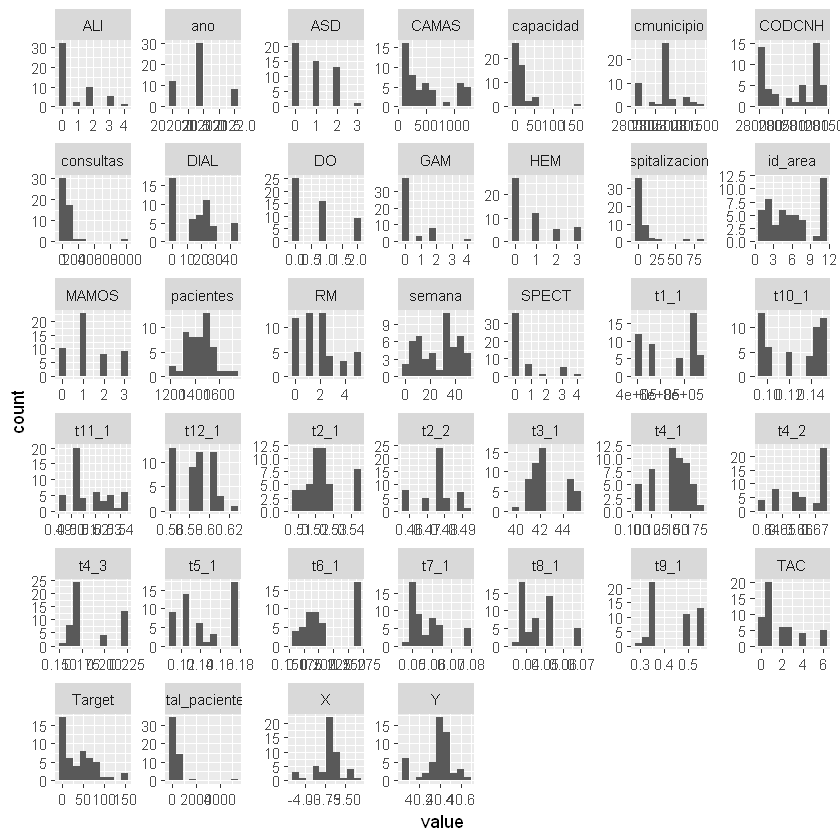

In [75]:
cdata |>
  pivot_longer(cols = everything()) |> 
  ggplot(aes(x = value)) +
  geom_histogram(bins = 10) +
  facet_wrap(~name, scales = "free")

### Box plot 

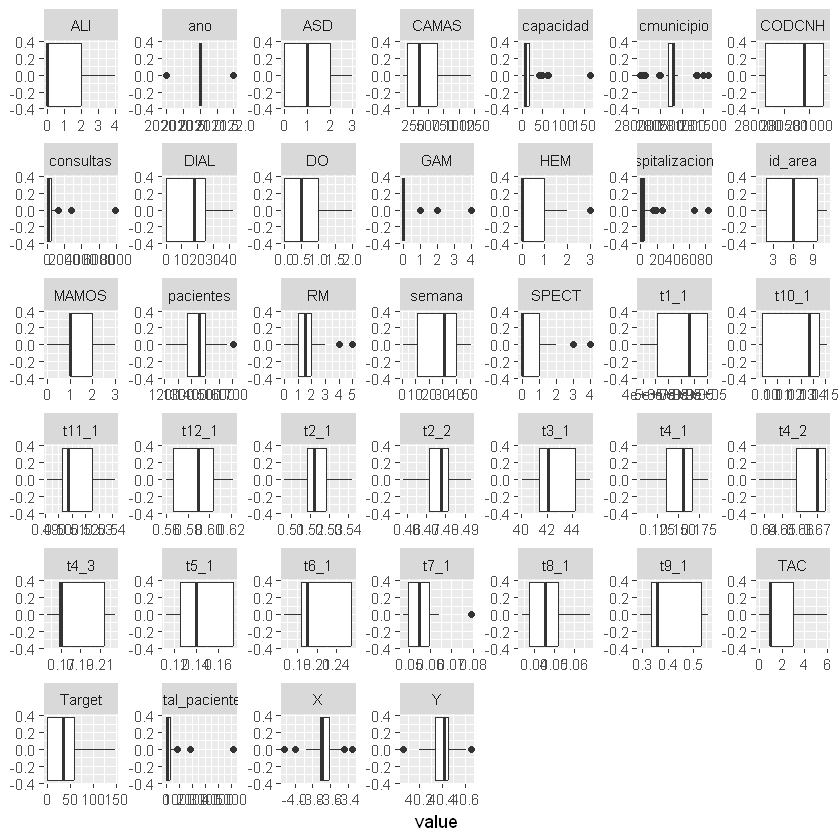

In [76]:
cdata |>
  pivot_longer(cols = everything()) |> 
  ggplot(aes(x = value)) +
  geom_boxplot() +
  facet_wrap(~name, scales = "free")

### Violin plot 

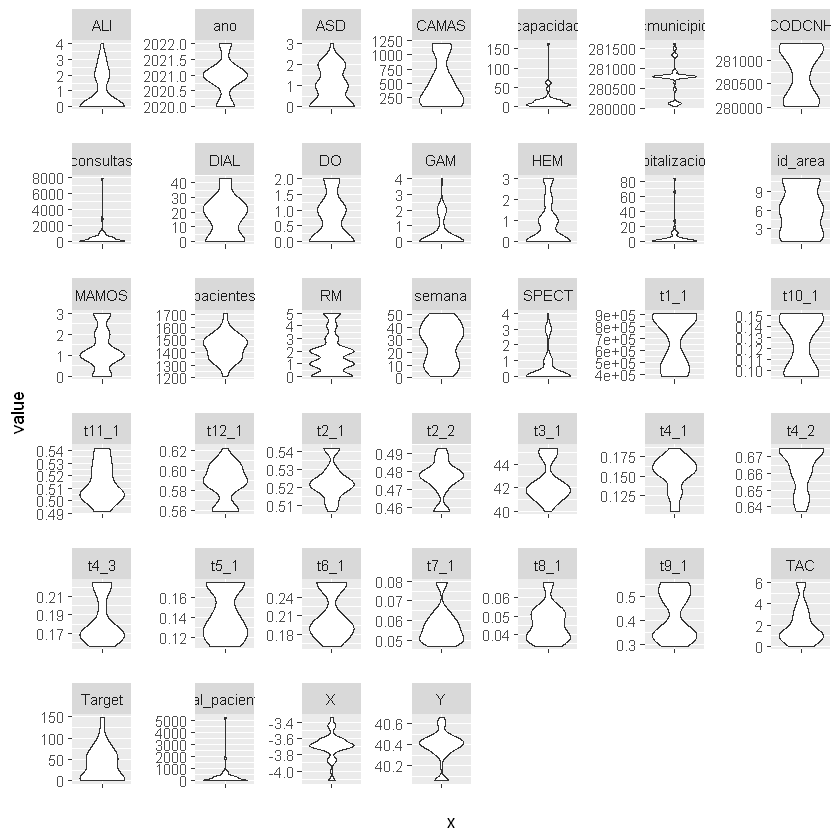

In [77]:
cdata |>
  pivot_longer(cols = everything()) |> 
  ggplot(aes(x = "", y = value)) +
  geom_violin() +
  facet_wrap(~name, scales = "free")

### Distribution plot 

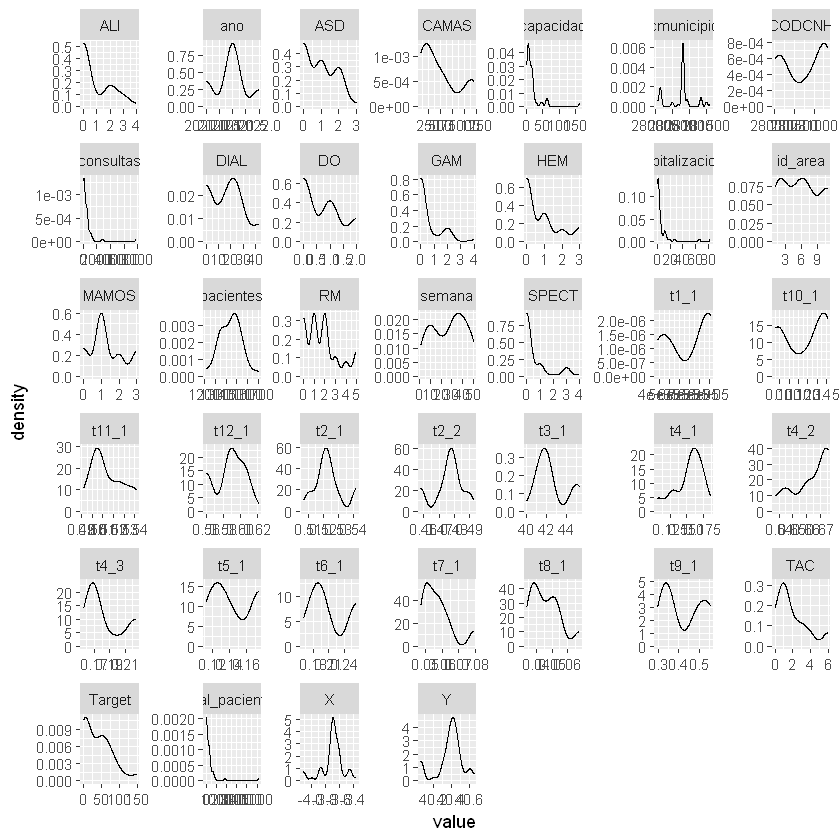

In [78]:
cdata |>
  pivot_longer(cols = everything()) |> 
  ggplot(aes(x = value)) +
  geom_density() +
  facet_wrap(~name, scales = "free")

##	Analyzing Categorical Variables 

### Selecting categorical variables

In [79]:
# Category colums
char_cols <- data |> select(where(~ !is.numeric(.x))) |> colnames()
char_cols

[1] "Hospital"     "Especialidad" "nombre_area"  "Municipio"    "Clase"       
[6] "Dependencia"  "is_train"

In [80]:
# Category colums
char_data <- data |> select(where(~ !is.numeric(.x))) 
head(char_data)

Hospital,Especialidad,nombre_area,Municipio,Clase,Dependencia,is_train
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>
HOSPITAL REY JUAN CARLOS,UROLOGÍA,SUR-OESTE I,MÓSTOLES,HOSPITALES GENERALES,SERVICIOS E INSTITUTOS DE SALUD DE LAS COMUNIDADES AUTÓNOMAS,TRUE
HOSPITAL CENTRAL DE LA DEFENSA GOMEZ ULLA,ODONTOESTOMATOLOGÍA,CENTRO-OESTE,MADRID,HOSPITALES GENERALES,MINISTERIO DE DEFENSA,TRUE
HOSPITAL UNIVERSITARIO DEL TAJO,GINECOLOGÍA,SUR II,ARANJUEZ,HOSPITALES GENERALES,SERVICIOS E INSTITUTOS DE SALUD DE LAS COMUNIDADES AUTÓNOMAS,TRUE
HOSPITAL UNIVERSITARIO DEL TAJO,DERMATOLOGÍA,SUR II,ARANJUEZ,HOSPITALES GENERALES,SERVICIOS E INSTITUTOS DE SALUD DE LAS COMUNIDADES AUTÓNOMAS,TRUE
HOSPITAL UNIVERSITARIO INFANTA ELENA,ODONTOESTOMATOLOGÍA,SUR II,VALDEMORO,HOSPITALES GENERALES,SERVICIOS E INSTITUTOS DE SALUD DE LAS COMUNIDADES AUTÓNOMAS,TRUE
HOSPITAL CENTRAL DE LA DEFENSA GOMEZ ULLA,CIRUGÍA TORÁCICA,CENTRO-OESTE,MADRID,HOSPITALES GENERALES,MINISTERIO DE DEFENSA,TRUE


### Visualization of categorical variables

## Statistical Normality Tests

In [81]:
cdata_long <- cdata |> 
  pivot_longer(cols = everything())

### Test de Shapiro-Wilk

Si hay muchos datos este no se puede hacer



In [82]:


tapply(cdata_long$value, cdata_long$name, shapiro.test)




$ALI

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.6947, p-value = 6.657e-09


$ano

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.78117, p-value = 3.316e-07


$ASD

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.81024, p-value = 1.522e-06


$CAMAS

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.83471, p-value = 6.115e-06


$capacidad

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.55977, p-value = 5.149e-11


$cmunicipio

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.84604, p-value = 1.211e-05


$CODCNH

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.81409, p-value = 1.88e-06


$consultas

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.39785, p-value = 5e-13


$DIAL

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.87571, p-value = 8.314e-05


$DO

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.75776, p-value = 1.06e-07


$GAM

	Shapiro-Wilk normality test

data:  X[[i]]
W = 0.5598, p-value = 5.153e-11


$HEM

	Shapiro-Wilk normality test

data:  X[[i]]

### Test de Anderson-Darling



In [83]:
tapply(cdata_long$value, cdata_long$name, ad.test)

$ALI

	Anderson-Darling normality test

data:  X[[i]]
A = 7.2641, p-value < 2.2e-16


$ano

	Anderson-Darling normality test

data:  X[[i]]
A = 5.2013, p-value = 4.857e-13


$ASD

	Anderson-Darling normality test

data:  X[[i]]
A = 3.9466, p-value = 5.636e-10


$CAMAS

	Anderson-Darling normality test

data:  X[[i]]
A = 2.9171, p-value = 1.928e-07


$capacidad

	Anderson-Darling normality test

data:  X[[i]]
A = 6.4759, p-value = 3.979e-16


$cmunicipio

	Anderson-Darling normality test

data:  X[[i]]
A = 3.9704, p-value = 4.926e-10


$CODCNH

	Anderson-Darling normality test

data:  X[[i]]
A = 3.5705, p-value = 4.729e-09


$consultas

	Anderson-Darling normality test

data:  X[[i]]
A = 8.9599, p-value < 2.2e-16


$DIAL

	Anderson-Darling normality test

data:  X[[i]]
A = 2.0702, p-value = 2.416e-05


$DO

	Anderson-Darling normality test

data:  X[[i]]
A = 5.0388, p-value = 1.207e-12


$GAM

	Anderson-Darling normality test

data:  X[[i]]
A = 10.381, p-value < 2.2e-16


$HEM

	Anderso

### Test de Lilliefors



In [84]:
tapply(cdata_long$value, cdata_long$name, lillie.test)

$ALI

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.39463, p-value < 2.2e-16


$ano

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.31023, p-value = 3.047e-13


$ASD

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.26349, p-value = 2.251e-09


$CAMAS

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.18643, p-value = 0.0001573


$capacidad

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.30254, p-value = 1.473e-12


$cmunicipio

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.29784, p-value = 3.776e-12


$CODCNH

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.22159, p-value = 1.672e-06


$consultas

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.33388, p-value = 1.814e-15


$DIAL

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.216, p-value = 3.66e-06


$DO

	Lilliefors (Kolmogorov-Smirnov) normal

### QQ-plots

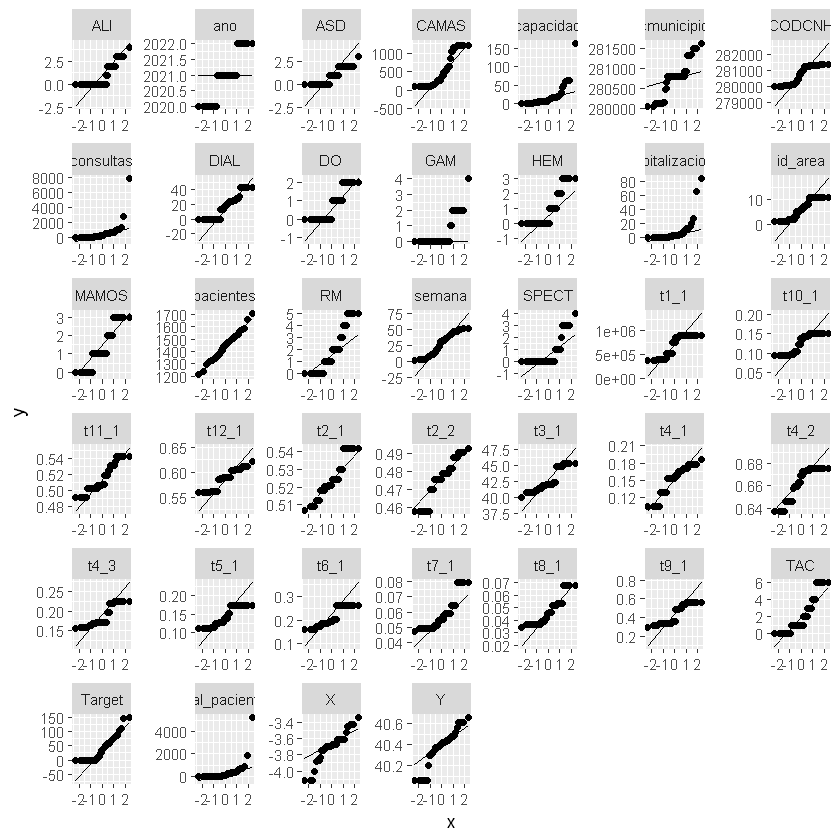

In [85]:
cdata |>
  pivot_longer(cols = everything()) |> 
  ggplot(aes(sample = value)) +
  geom_qq() +
  geom_qq_line() +
  facet_wrap(~name, scales = "free")

## Bivariate analysis

* Ver gráficos de dispersión y ggpairs arriba
* Completar si es necesario con alguna comparación específica (gráfico de dispersión o boxplot por grupos)

Correlaciones

In [86]:
cor(cdata, use = "pairwise.complete.obs")

,total_pacientes,ano,semana,CODCNH,id_area,cmunicipio,CAMAS,TAC,RM,GAM,⋯,t8_1,t9_1,t10_1,t11_1,t12_1,capacidad,pacientes,consultas,hospitalizaciones,Target
total_pacientes,1.000000000,0.015072844,-0.065076294,-0.19430715,-0.19001411,0.066341035,0.33619665,-0.043785077,-0.05579869,0.152550212,⋯,0.128467157,0.23053560,-0.24338255,0.06970381,-0.127024912,0.87532266,0.126162282,0.99996163,0.794250190,0.316682109
ano,0.015072844,1.000000000,-0.255009696,-0.22373644,-0.04427616,0.067890616,0.16456189,0.066061277,-0.01982743,0.136150902,⋯,-0.042406216,-0.01679154,0.03078251,0.02369271,0.053516487,-0.06154029,-0.057162673,0.01553677,0.044480511,-0.062370615
semana,-0.065076294,-0.255009696,1.000000000,0.14510980,0.03944873,-0.133486833,-0.12797291,0.187626371,0.19592802,0.135751701,⋯,-0.141597770,-0.29085329,0.26024066,0.04883753,0.253982619,-0.06313624,0.123566872,-0.06593620,-0.005287760,0.014929694
CODCNH,-0.194307145,-0.223736437,0.145109802,1.00000000,0.07879005,-0.152965276,-0.71776882,-0.368709268,-0.20458234,-0.497464173,⋯,-0.131500219,-0.37662854,0.34470449,0.01829785,0.291708260,-0.22826114,-0.240028532,-0.19367793,-0.244557093,-0.062308714
id_area,-0.190014107,-0.044276161,0.039448729,0.07879005,1.00000000,-0.171809913,0.11411538,0.434849517,0.54349694,0.308947259,⋯,-0.383780760,-0.46489505,0.49793809,-0.35011793,0.051599479,-0.21601854,-0.045035336,-0.18996258,-0.156212193,-0.145384204
cmunicipio,0.066341035,0.067890616,-0.133486833,-0.15296528,-0.17180991,1.000000000,0.11427198,0.095828611,0.12089598,-0.009662804,⋯,0.391943482,0.27019735,-0.31367922,0.25114283,-0.015826996,0.02480735,-0.094349423,0.06585074,0.062101878,0.134800314
CAMAS,0.336196650,0.164561885,-0.127972906,-0.71776882,0.11411538,0.114271978,1.00000000,0.473901220,0.42324882,0.518203430,⋯,-0.032160375,0.12058700,-0.11129243,-0.06294695,-0.151565321,0.21096749,0.198652718,0.33541859,0.292210022,0.236164866
TAC,-0.043785077,0.066061277,0.187626371,-0.36870927,0.43484952,0.095828611,0.47390122,1.000000000,0.94155069,0.774609860,⋯,-0.235320077,-0.24228358,0.30643520,-0.33742491,-0.078757057,-0.02045323,0.144741880,-0.04325872,0.047829913,0.167319800
RM,-0.055798691,-0.019827426,0.195928021,-0.20458234,0.54349694,0.120895981,0.42324882,0.941550691,1.00000000,0.713658001,⋯,-0.247542899,-0.28592319,0.34444554,-0.37917915,-0.092491244,-0.03305536,0.040606321,-0.05523169,0.024163484,0.111197887
GAM,0.152550212,0.136150902,0.135751701,-0.49746417,0.30894726,-0.009662804,0.51820343,0.774609860,0.71365800,1.000000000,⋯,-0.154733323,-0.09831467,0.15097509,-0.15608009,-0.031203311,0.22359259,0.094053076,0.15285427,0.444789519,0.090665866


## Regression analysis

### Modelo completo regresión lineal simple

In [87]:
modelo <- lm(Target ~ ., data = cdata)
summary(modelo)


Call:
lm(formula = Target ~ ., data = cdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-54.882 -10.576  -0.073  13.368  50.968 

Coefficients: (8 not defined because of singularities)
                    Estimate Std. Error t value Pr(>|t|)   
(Intercept)        9.661e+05  9.511e+05   1.016   0.3225   
total_pacientes   -9.296e-01  1.227e+00  -0.758   0.4578   
ano               -4.167e+01  1.401e+01  -2.974   0.0078 **
semana            -3.239e-01  5.438e-01  -0.596   0.5585   
CODCNH             2.016e-01  8.553e-02   2.357   0.0293 * 
id_area           -1.670e+01  6.839e+01  -0.244   0.8097   
cmunicipio         4.052e-02  8.307e-02   0.488   0.6313   
CAMAS              1.512e-01  1.020e-01   1.482   0.1546   
TAC                2.015e+02  9.082e+01   2.219   0.0389 * 
RM                 9.319e+00  4.767e+01   0.196   0.8471   
GAM               -3.268e+01  5.014e+01  -0.652   0.5224   
HEM               -5.000e+01  4.333e+01  -1.154   0.2628   
ASD               -3.217

Warning message:
"not plotting observations with leverage one:
  25"


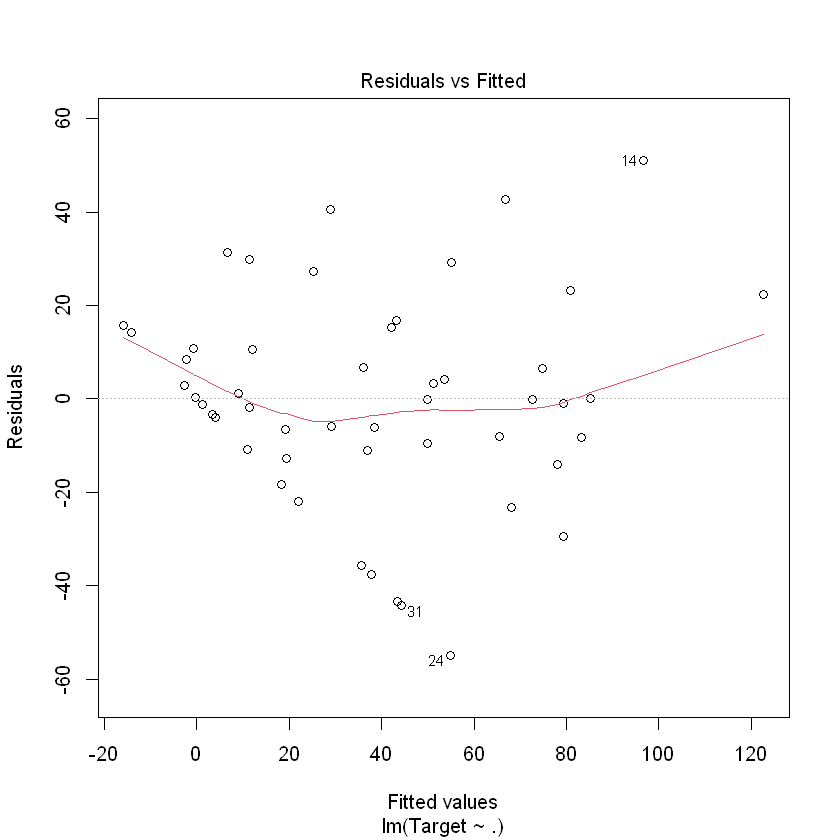

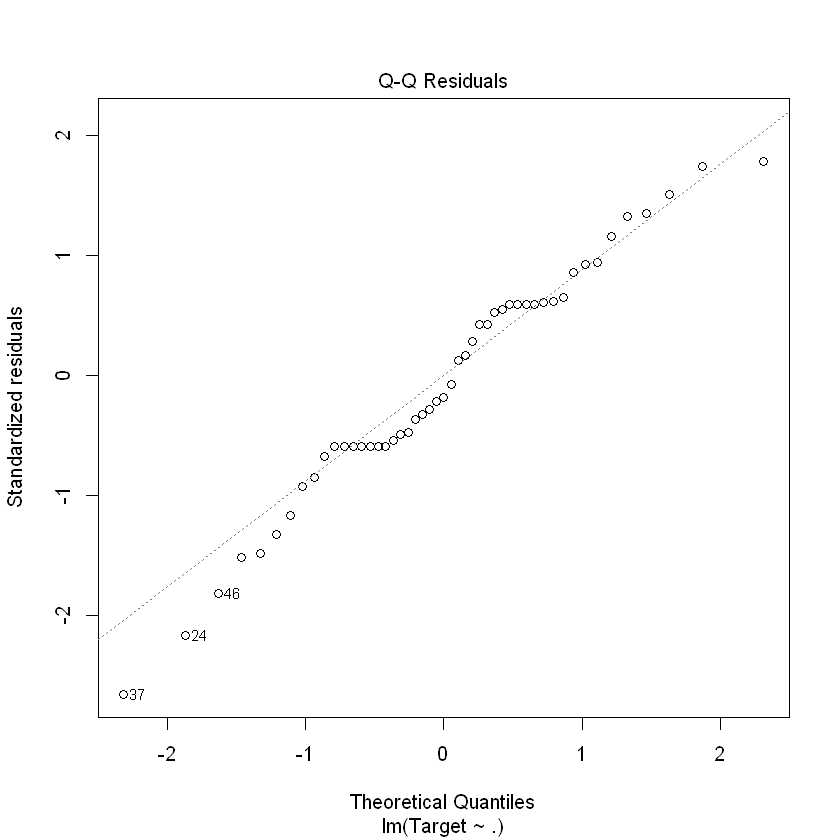

Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"
Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"


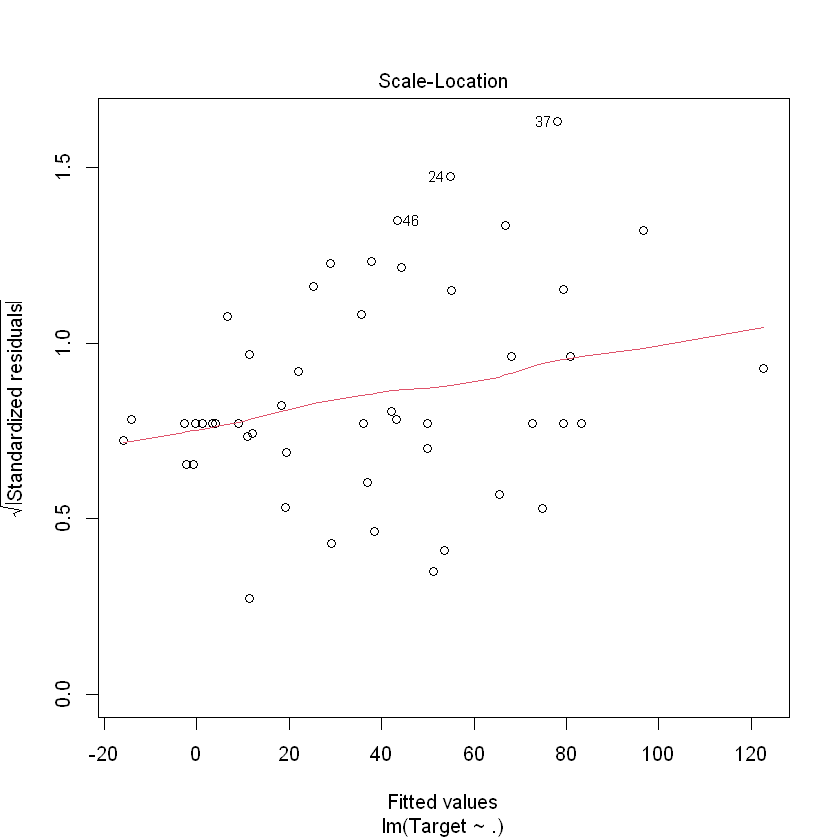

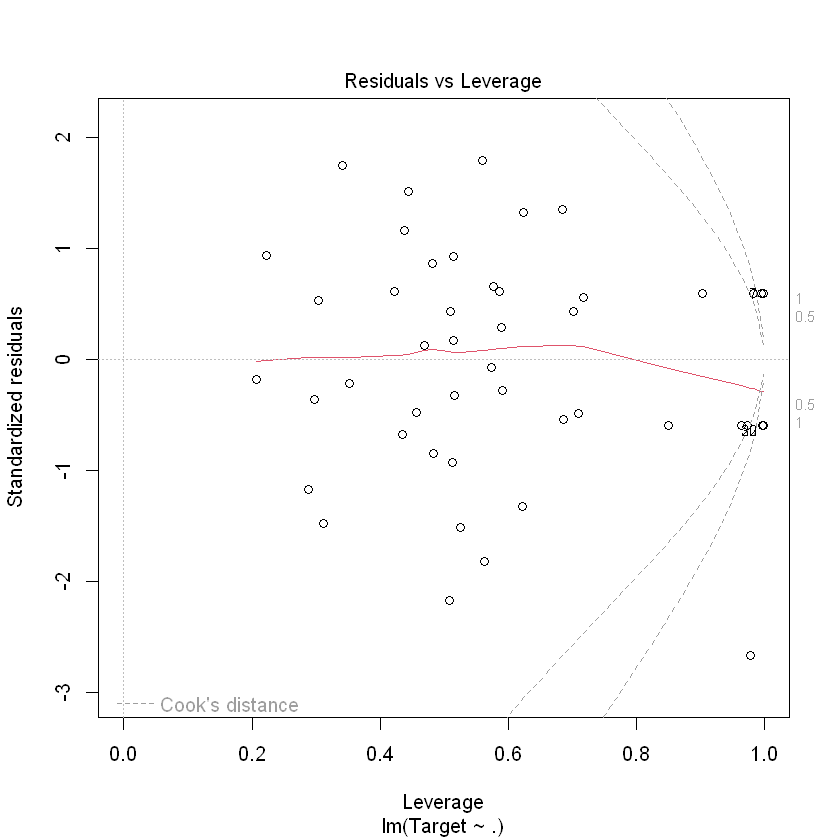

In [88]:
plot(modelo)

### Selección de variables

Puede que dé error por la estructura de los datos, en ese caso dejarlo indicado

In [89]:
modelo2 <- step(modelo, trace = FALSE)
summary(modelo2)



Call:
lm(formula = Target ~ total_pacientes + ano + CODCNH + cmunicipio + 
    CAMAS + TAC + HEM + ALI + SPECT + MAMOS + DO + DIAL + Y + 
    t3_1 + t1_1 + t2_1 + t2_2 + t4_2 + t5_1 + capacidad + consultas, 
    data = cdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-55.927 -12.013   0.651  14.491  52.786 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      3.280e+05  8.924e+04   3.676 0.000995 ***
total_pacientes -1.355e+00  8.522e-01  -1.590 0.123017    
ano             -3.097e+01  9.899e+00  -3.129 0.004077 ** 
CODCNH           1.410e-01  4.840e-02   2.914 0.006946 ** 
cmunicipio       3.312e-02  2.725e-02   1.216 0.234321    
CAMAS            7.888e-02  3.240e-02   2.434 0.021552 *  
TAC              1.337e+02  3.937e+01   3.395 0.002069 ** 
HEM             -2.572e+01  1.881e+01  -1.368 0.182339    
ALI             -8.843e+01  3.475e+01  -2.545 0.016732 *  
SPECT            4.331e+01  1.714e+01   2.527 0.017432 *  
MAMOS          

## Stationary analysis

- Si hay una variable fecha, usarla
- Si hay mes, o semana, convertir a fecha

In [90]:
tsdata <- data |>
    mutate(fecha = as.Date(parse_date_time(paste(ano, semana, 1, sep="/"),'Y/W/w')))

## <font color='green'>Data Save</font>

* Solo si se han hecho cambios

* No aplica

<font color='tomato'> Identificamos los datos a guardar</font>

In [ ]:
data_to_save <- data


<font color='tomato'>Estructura de nombre de archivos:</font>

* Código del caso de uso, por ejemplo "CU_04"
* Número del proceso que lo genera, por ejemplo "_06".
* Resto del nombre del archivo de entrada
* Extensión del archivo

Ejemplo: "CU_04_06_01_01_zonasgeo.json, primer fichero que se genera en la tarea 01 del proceso 05 (Data Collection) para el caso de uso 04 (vacunas) y que se ha transformado en el proceso 06

Importante mantener los guiones bajos antes de proceso, tarea, archivo y nombre

### Proceso 12

In [ ]:
# caso <- "CU_XX"
# proceso <- '_10'
# tarea <- "_XX"
# archivo <- ""
# proper <- "_xxxxx"
# extension <- ".csv"

<font color='tomato'><b> OPCION A:</b> Uso del paquete "tcltk" para mayor comodidad</font>

* Buscar carpeta, escribir nombre de archivo SIN extensión (se especifica en el código)
* Especificar sufijo2 si es necesario
* Cambiar datos por datos_xx si es necesario

In [ ]:
# file_save <- paste0(caso, proceso, tarea, tcltk::tkgetSaveFile(), proper, extension) 
# path_out <- paste0(oPath, file_save)
# write_csv(data_to_save_xxxxx, path_out)

# cat('File saved as: ')
# path_out

<font color='tomato'><b> OPCION B:</b> Especificar el nombre de archivo</font>

- Los ficheros de salida del proceso van siempre a Data/Output/.  

In [ ]:
# file_save <- paste0(caso, proceso, tarea, archivo, proper, extension) 
# path_out <- paste0(oPath, file_save)
# write_csv(data_to_save_xxxxx, path_out)

# cat('File saved as: ')
# path_out

#### Copia del fichero a Input

Si el archivo se va a usar en otros notebooks, copiar a la carpeta Input

In [ ]:
# path_in <- paste0(iPath, file_save)
# file.copy(path_out, path_in, overwrite = TRUE)

## <font color='#2874a6'>REPORT</font>

A continuación se realizará un informe de las acciones realizadas

## <font color=' #2874a6 '>Main Actions Carried Out</font>

- Se ha realizado exploratorio de los datos del caso de uso

## <font color=' #2874a6 '>Main Conclusions</font>

- Los datos son adecuados para el caso de uso


## <font color='RED'>CODE TO DEPLOY (PILOT)</font>

A continuación se incluirá el código que deba ser llevado a despliegue para producción, dado que se entiende efectúa operaciones necesarias sobre los datos en la ejecución del prototipo

<font color=' red '><b>Description</b></font>

- No hay nada que desplegar en el piloto, ya que estos datos son estáticos o en todo caso cambian con muy poca frecuencia, altamente improbable durante el proyecto.


<font color=' red '><b>CODE</b></font>